
<a href="http://www.cosmostat.org/" target="_blank"><img align="left" width="300" src="http://www.cosmostat.org/wp-content/uploads/2017/07/CosmoStat-Logo_WhiteBK-e1499155861666.png" alt="CosmoStat Logo"></a>
<br>
<br>
<br>
<br>

# Numpy Intro

---

> Author: <a href="http://www.cosmostat.org/people/santiago-casas" target="_blank" style="text-decoration:none; color: #F08080">Santiago Casas</a>  
> Email: <a href="mailto:santiago.casas@cea.fr" style="text-decoration:none; color: #F08080">santiago.casas@cea.fr</a>  
> Year: 2019  
> Version: 1.0

---
<br>



So far we have seen how to use and define *lists, dictionaries, functions* and some other *pythonic* tools. However, in scientific research one often needs more than simple algorithms and one needs specialized libraries for working with arrays, math functions, databases and graphics.

## Let's start by importing the necessary libraries

In [1]:
import numpy

It more convenient to assign the numpy package contents to an alias to avoid having longer expressions.

In [2]:
import numpy as np

In this example the **`as`** statement assigns the numpy package contents to the object `np`.

---

## Arrays

### The Basics

The most essential numpy object is the numpy array (<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html" target="_blank">numpy.ndarray</a>).

In [3]:
# a is a list
a = [1, 2, 3, 4]
print('a is', type(a))

# b is a numpy array
b = np.array(a)
print('b is', type(b))

a is <class 'list'>
b is <class 'numpy.ndarray'>


Accessing and printing a single entry works exactly the same.

In [4]:
print('first element of a is', a[0])
print('first element of b is', b[0])

first element of a is 1
first element of b is 1


In [5]:
print('last element of a is', a[-1])
print('last element of b is', b[-1])

last element of a is 4
last element of b is 4


However, their printed forms are slightly different.

In [6]:
print('list: ', a)
print('np array: ',b)

list:  [1, 2, 3, 4]
np array:  [1 2 3 4]


Moreover, while lists can contain different object types

In [8]:
a = [1, 1.0, 'a', True]
print(a)

[1, 1.0, 'a', True]


numpy arrays are of a single type only, which is one of the reasons why they are so efficient.

---




For example, in this case it will convert all entries to strings (upcasting)

In [9]:
np.array(a)

array(['1', '1.0', 'a', 'True'], dtype='<U32')

Or in this case, all entries to floats

In [10]:
np.array([1, 2.5, 23, 100.0, np.pi])

array([  1.        ,   2.5       ,  23.        , 100.        ,
         3.14159265])

One can also specify the type directly with the optional argument **dtype** and the entries will be converted to the specified type.

In [11]:
np.array([1, 2.5, 23, 100.0, np.pi], dtype='int32')

array([  1,   2,  23, 100,   3], dtype=int32)

Did you notice the $\pi$ constant in the list above? Here you can find a list of available (<a href="https://www.numpy.org/devdocs/reference/constants.html" target="_blank">constants</a>). Another one useful in science is

In [12]:
#Euler's constant
np.e

2.718281828459045

## Creating arrays from scratch

Sometimes it is useful to create a numpy array in a fast way from scratch. Numpy offers several neat methods.

### Zeros and Ones

In [13]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# Create a length-5 floating-point array filled with ones
np.ones(5, dtype=float)

array([1., 1., 1., 1., 1.])

### A range and linspace

One of the most useful arrays for everyday scientific work is to create arrays that contain evenly-spaced numbers within an interval. 

In [15]:
#A range of floats up to 3.0 with default step 1.0
print(np.arange(3.0))
# A range from start to stop, with a given step
print(np.arange(5.0, 405., 50))

[0. 1. 2.]
[  5.  55. 105. 155. 205. 255. 305. 355.]


> **<font color='red'>NOTE:</font>** Note that with **`arange`** the endpoint is not included !

Remember to check the documentation within the Jupyter notebook running on a cell: **`?np.arange`**

If one needs to specify the number of samples and also include the endpoint, then linspace is the right tool. It even contains an optional argument `endpoint`, which defaults to `True`.

In [16]:
#Three floats evenly spaced in the interval 0. to 3. 
print(np.linspace(0.,3.,3))

[0.  1.5 3. ]


In [17]:
#With endpoint=False, we get the same behavior as `np.arange`
print(np.linspace(0.,3.,3, endpoint=False))

[0. 1. 2.]


In [18]:
#default number of samples is 50
np.linspace(0,100)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

Another important array for scientists is a **logarithmically-spaced** interval. The default logarithm is base 10, but that can be changed with the `base` optional argument. The initial and final values of the interval have to be specified in their logarithms.

In [19]:
# A log10-spaced interval from 10^-2 to 10^3 of size 5.
np.logspace(-2, 3, 5)

array([1.00000000e-02, 1.77827941e-01, 3.16227766e+00, 5.62341325e+01,
       1.00000000e+03])

Applying a $\log_{10}$ on the whole array shows that it is indeed log-spaced.

In [20]:
np.log10(np.logspace(-2, 3, 5))

array([-2.  , -0.75,  0.5 ,  1.75,  3.  ])

> **Notice** how we are using `numpy` internal functions, called uFuncs to calculate properties on the entire array. We will explain that better a bit later.

In [23]:
#A ln-spaced interval from e^-1 to e^4 of size 4.
e_array = np.logspace(np.log(np.exp(-1)), np.log(np.exp(4)), 4, base=np.e)

> **Puzzle 1:** What is the ouput of `np.log(e_array)[-1]` ?

In [24]:
#Answer Puzzle 1:
#Uncomment to see the answer
#print('the result is: ', np.log(e_array)[-1])

### Multi-dimensional arrays

Arrays can also be multi-dimensional. And their shape can be specified at creation.

In [25]:
#2-dimensional array of size 3x5
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Creating the ***identity*** matrix of size 5

In [26]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

`np.eye` is a generalization of the identity, with arguments `numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')`. `N` is the number of rows of the array, `M` defaults to `N` and is the number of columns, while `k` shifts the diagonal by a positive or negative integer with respect to the main diagonal. The other arguments can be looked up in the documentation.

In [27]:
#rectangular matrix
np.eye(3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [28]:
#shifted diagonal
np.eye(5, k=2)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Sometimes one just needs an array with garbage numbers which is to be filled later on. `np.empty` does the job:

In [30]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty((3,6))

array([[6.94943210e-310, 3.01196083e-310, 7.30927250e-114,
        2.87500054e+161, 1.30451617e+243, 7.41213130e-310],
       [1.40771468e-147, 2.61377458e+214, 2.78930039e-312,
        3.63186350e+183, 7.34294124e+223, 3.38460824e+125],
       [4.23409051e-290, 2.81052326e-312, 2.86530658e+161,
        1.24992179e+243, 6.92322347e-310, 4.23345919e-290]])

Very useful in science is the creation of arrays with **random numbers** following a given distribution. Check the extensive documentation of (<a href="https://www.numpy.org/devdocs/reference/random/index.html?highlight=random#module-numpy.random" target="_blank">numpy.random</a>) for much more information on all the available methods.

In [31]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.60086744,  0.56455324,  0.63865872],
       [ 0.89719631,  0.48993158, -1.3348991 ],
       [-0.42340179, -0.95121262, -0.30160685]])

In [33]:
# Create a 6x6 array of uniformly distributed
# random integers between 0 and 10
rand_mat = np.random.randint(0, 10, (6, 6))
print(rand_mat[:,0])

[9 6 5 5 6 0]


One can create a random set of points following a Gaussian distribution with a given covariance.

In [34]:
mean = [0, 0]
cov = [[1, 0.5],
       [0.5, 2]]
X = np.random.multivariate_normal(mean, cov, 1000)
X.shape

(1000, 2)

> **<font color='red'>NOTE:</font>** We will see more details about matplotlib in the next session!

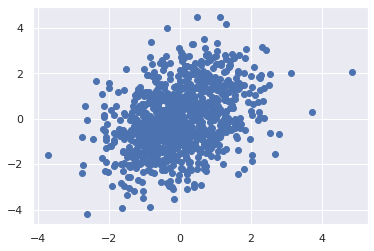

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

To construct multi-dimensional arrays, one can also reshape 1-dimensional arrays, using the useful method `reshape(i,j)`. The arguments indicate the rows and the columns of the new array.

In [37]:
# Convert 1-dim array into 2x2 matrix
e_array.reshape((2,2))

array([[ 0.36787944,  1.94773404],
       [10.3122585 , 54.59815003]])

In [38]:
# Reshape a 2-dim array
rand_mat.reshape(9,4)

array([[9, 0, 9, 9],
       [4, 5, 6, 4],
       [6, 7, 9, 8],
       [5, 4, 8, 5],
       [2, 3, 5, 1],
       [4, 6, 8, 8],
       [6, 0, 4, 7],
       [6, 2, 0, 4],
       [6, 9, 3, 9]])

If the second argument is `-1` then the size of the second axis is inferred from the previous array.

In [39]:
rand_mat.reshape(3,-1)

array([[9, 0, 9, 9, 4, 5, 6, 4, 6, 7, 9, 8],
       [5, 4, 8, 5, 2, 3, 5, 1, 4, 6, 8, 8],
       [6, 0, 4, 7, 6, 2, 0, 4, 6, 9, 3, 9]])

> **Puzzle 2:** The attribute `shape` returns the shape of a numpy array in the form of a tuple. What is the output of `rand_mat.reshape(2,-1).shape[1]` ?

In [41]:
#Answer Puzzle 2:
#Uncomment to see the answer
#print('the answer is: ', rand_mat.reshape(2,-1).shape[1])

Another useful method is `np.ravel` which is roughly the "inverse" of reshape in this case. It returns a flattened 1-d array from a 2-d array, equivalent in most cases to `np.flatten`.

In [42]:
e_array.reshape((2,2)).ravel()

array([ 0.36787944,  1.94773404, 10.3122585 , 54.59815003])

In [43]:
e_array.reshape((2,2)).flatten()

array([ 0.36787944,  1.94773404, 10.3122585 , 54.59815003])

And for scientific purposes, the ***transpose*** is a very important attribute

In [44]:
e_array.reshape((2,2)).T

array([[ 0.36787944, 10.3122585 ],
       [ 1.94773404, 54.59815003]])

In [45]:
(e_array.reshape((2,2)).T)[0,1]==(e_array.reshape((2,2)))[1,0]

True

Other available attributes are:

In [46]:
print("Number of dimensions, ndim: ", rand_mat.ndim)
print("Array shape:", rand_mat.shape)
print("Array size: ", rand_mat.size)

Number of dimensions, ndim:  2
Array shape: (6, 6)
Array size:  36


## Slicing and accessing elements

As you might now, slicing works for lists, using the `:` operator

In [47]:
list = [1,2,3,4,5,6]

In [48]:
#Take the first two elements of the list
list[:2]

[1, 2]

In [49]:
print(list[2:])
#Omitting the number after the semicolon is equivalent to indicating the list size:
list[2:6] ==  list[2:]

[3, 4, 5, 6]


True

In [ ]:
#Take every second element
list[::2]

In [50]:
#Reverse the list
list[::-1]

[6, 5, 4, 3, 2, 1]

> Slicing in visual form:

<img src='https://scipy-lectures.org/_images/numpy_indexing.png' width='600'>

Here we extend our `e_array` by concatenating it with the useful method `concatenate`, three times.

In [51]:
extended_array = np.concatenate([e_array, e_array, e_array])
print(extended_array)

[ 0.36787944  1.94773404 10.3122585  54.59815003  0.36787944  1.94773404
 10.3122585  54.59815003  0.36787944  1.94773404 10.3122585  54.59815003]


To obtain three times the same number, we just need to get every fourth element

In [52]:
extended_array[::4]

array([0.36787944, 0.36787944, 0.36787944])

> **Puzzle 3:** Obtain the array `[4., 4., 4.]` from `extended_array` by using slicing and `log`.

In [46]:
#Answers can be found in the Answers.ipynb

> **<font color='red'>NOTE:</font>** Slicing performs a view of the element and not a copy !

### Slicing: View vs. Copy

In [53]:
# Nested list comprehension
array2d = np.array([[ ii+jj for jj in range((ii-1)*4,(ii-1)*4+5)] for ii in range(1,1+4)])
print(array2d)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


For multi-dimensional arrays, the different axis are accessed by separating the slices with commas.

In [48]:
#All rows, every other column
array2d[:,::2]

array([[ 1,  3,  5],
       [ 6,  8, 10],
       [11, 13, 15],
       [16, 18, 20]])

In [54]:
#Fourth row, all columns
array2d[3,:]

array([16, 17, 18, 19, 20])

In [55]:
#Obtain shape
array2d.shape

(4, 5)

In [56]:
#Obtain central array
array2d_center=array2d[1:array2d.shape[0]-1, 1:array2d.shape[1]-1]
print(array2d_center)

[[ 7  8  9]
 [12 13 14]]


In [57]:
#Now if we modify this subarray, we'll see that the original array is changed! 
array2d_center[0,0]=1001.5

In [58]:
print(array2d_center)

[[1001    8    9]
 [  12   13   14]]


In [59]:
print(array2d)

[[   1    2    3    4    5]
 [   6 1001    8    9   10]
 [  11   12   13   14   15]
 [  16   17   18   19   20]]


> **<font color='red'>NOTE:</font>** Notice not only the big array was changed, but also how numpy converted automatically the type of the variable to `int`, to match the other variable types !

From the `Python Data Science Handbook`: This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

However, if we don't want this behavior, because it can be confusing and introduce possible bugs (believe me, it has happened to me), we can use the `copy` method.

In [60]:
sub_array = array2d[2:,:3].copy()
print(sub_array)

[[11 12 13]
 [16 17 18]]


In [61]:
#Modify an element of the subarray
sub_array[1,1] = 999
print(sub_array)

[[ 11  12  13]
 [ 16 999  18]]


Now the large array is not touched:

In [62]:
print(array2d)

[[   1    2    3    4    5]
 [   6 1001    8    9   10]
 [  11   12   13   14   15]
 [  16   17   18   19   20]]


Useful trick: Many elements of the large array can be modified through the small array using slicing.

In [63]:
array2d_center[:2,:2]=[[42,42],[42,42]]

In [64]:
print(array2d)

[[ 1  2  3  4  5]
 [ 6 42 42  9 10]
 [11 42 42 14 15]
 [16 17 18 19 20]]


> **Puzzle 4:** Change all the last two columns by zeros using slicing, np.shape and np.zeros (assuming you don't know the size of the array beforehand)

In [60]:
#Answers.ipynb

## Numpy integrated universal functions

The power of **numpy** lies in its speed and efficiency in performing operations on large arrays.

Functions that operate on the entire array are called ***universal functions*** or for short, uFuncs.

### Arithmetic

In [65]:
x = np.arange(5)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)   # modulo

x     = [0 1 2 3 4]
x + 5 = [5 6 7 8 9]
x - 5 = [-5 -4 -3 -2 -1]
x * 2 = [0 2 4 6 8]
x / 2 = [0.  0.5 1.  1.5 2. ]
x // 2 = [0 0 1 1 2]
-x     =  [ 0 -1 -2 -3 -4]
x ** 2 =  [ 0  1  4  9 16]
x % 2  =  [0 1 0 1 0]


These operators are actually wrappers to the method form:

In [66]:
np.add(x,5)

array([5, 6, 7, 8, 9])

In [67]:
np.floor_divide(x,2)

array([0, 0, 1, 1, 2])

More functions like this can be found in the documentation of the <a href="https://www.numpy.org/devdocs/reference/ufuncs.html#available-ufuncs" target="_blank">uFuncs</a> .

### Trigonometric functions

Numpy can compute mathematical functions very efficiently over a large array. They are computed to withon machine precision, therefore tiny values instead of exact zeros can appear.

In [68]:
# An array of 3000 elements between 0 and Pi.
theta = np.linspace(0, np.pi, 3000)
print("theta      = ", theta[0])
print("sin(theta) = ", np.sin(theta)[-1])
print("cos(theta) = ", np.cos(theta)[0])
print("tan(theta) = ", np.tan(theta)[-1])

theta      =  0.0
sin(theta) =  1.2246467991473532e-16
cos(theta) =  1.0
tan(theta) =  -1.2246467991473532e-16


Numpy also offers mathematical functions like `exp` and `log` and versions that are more accurate for tiny numbers, like **`expm1`** and **`log1p`**. 

In [70]:
# For tiny x values, log(1+x) and exp(x)-1 are very very close to x.
x = np.array([0., 1e-10, 1e-12, 1e-14])
print("     exp(x) - 1 =", np.expm1(x))
print("std: exp(x) - 1 =", np.exp(x)-1.0)
print("     log(1 + x) =", np.log1p(x))
print("std: log(1 + x) =", np.log(1.0+x))

     exp(x) - 1 = [0.e+00 1.e-10 1.e-12 1.e-14]
std: exp(x) - 1 = [0.00000000e+00 1.00000008e-10 1.00008890e-12 9.99200722e-15]
     log(1 + x) = [0.e+00 1.e-10 1.e-12 1.e-14]
std: log(1 + x) = [0.00000000e+00 1.00000008e-10 1.00008890e-12 9.99200722e-15]


There are tons of functionalities more, but this is just a rough overview. In the documentation and many other excellent tutorials and books, such as the 
    <a href="https://jakevdp.github.io/PythonDataScienceHandbook/"  target="_blank">Python Data Science Handbook</a>  one can find much more on these topics.

## Slowness of loops and lists vs. Numpy 

In a standard programming language, like C, we would have to define the following non-pythonic function in order to compute the reciprocal of a list

In [71]:
def compute_reciprocals(values):
    output = []
    for i in range(len(values)):
        output.append(1.0 / values[i])
    return output

In [72]:
a_list = np.random.randint(1,10,10000000).tolist()  #notice the tolist method here
print(a_list[0])

1


Computing the reciprocal will be slow, since each element of the python list is a data structure object.

In [73]:
%%time
b_list = compute_reciprocals(a_list)
#print(b_list[0])

CPU times: user 852 ms, sys: 63.3 ms, total: 915 ms
Wall time: 915 ms


> `%time` is one of these magic functions we will see explained in the next session.

In [74]:
a_array = np.random.randint(1,10,10000000)

In Numpy we don't even need to define a function, we just calculate 1.0/list.

In [75]:
%%time
b_array = 1.0 / a_array
#print(b_array)

CPU times: user 15.3 ms, sys: 24.2 ms, total: 39.5 ms
Wall time: 38.7 ms


> 25 times faster?

## Broadcasting

One of the most powerful features of `numpy` is, as we just saw, the fact that one can operate directly on entire arrays, element by element, without the need of cumbersome loops.

***Broadcasting*** is a way of applying uFuncs to arrays of different sizes. In the simplest case, addition, multiplication and so on, but actually it can be done with any uFunc that receives 2 arguments.

In [76]:
# Add a scalar to an array
s=5
ones = np.ones((3,5))
sixes = ones + s

In [77]:
print(sixes)

[[6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6.]]


In [78]:
# Add two arrays
ones + sixes

array([[7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.]])

> **<font color='red'>NOTE:</font>** Lists do not behave like that, when added, they concatenate.

In [79]:
#Convert numpy arrays to lists
ones.tolist() + sixes.tolist()

[[1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [6.0, 6.0, 6.0, 6.0, 6.0],
 [6.0, 6.0, 6.0, 6.0, 6.0],
 [6.0, 6.0, 6.0, 6.0, 6.0]]

One can also add arrays of different sizes, thanks to broadcasting.

In [80]:
a = np.array([0,1,2])
b = np.ones((3,3))
print('a= ',a)
print('b=', b)

a=  [0 1 2]
b= [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [81]:
a+b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [82]:
print('shape: ', a.shape, '| dimensions: ', a.ndim, '| size: ', a.size)

shape:  (3,) | dimensions:  1 | size:  3


In [83]:
print('shape: ', b.shape, '| dimensions: ', b.ndim, '| size: ', b.size)

shape:  (3, 3) | dimensions:  2 | size:  9


In this case what `numpy` has done is to compare the shape of the arrays. 
    - If they differ in the number of dimensions the shape gets augmented on the left (padded) with 1s. 
    - Then, if the arrays do not match in all their dimensions, the array with the padded 1s, is stretched in that dimension to match the size of the other array. 
    - Finally the two arrays can be combined.
<img src="./materials/02.05-broadcasting.png" width="600">

For the third graphical example we can create row and column vectors using slicing.

In [84]:
x = np.array([0,1,2])
# row vector
row = x[np.newaxis, :]
print(row)

[[0 1 2]]


What `np.newaxis` does is to increase the dimensions of the array by 1 on the axis where it is used.

In [85]:
row.shape

(1, 3)

In [86]:
#column vector
col = x[:,np.newaxis]
print(col)

[[0]
 [1]
 [2]]


In [87]:
col.shape

(3, 1)

In [88]:
row + col

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Notice that with simple 1-d arrays, we do get the expected scalar in the dot product:

In [89]:
np.dot(x,x)

5

While with the row and column vectors we get a matrix:

In [90]:
np.dot(row,col)

array([[5]])

In [91]:
np.dot(col,row)

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

Boradcasting is much more powerful and has many more subtleties that we cannot cover here. I refer again to  <a href="https://jakevdp.github.io/PythonDataScienceHandbook/"  target="_blank">Python Data Science Handbook</a> for a deeper treatment of this.


## Fancy indexing and masking

Finally, let's look at a couple of important tricks and methods available for numpy arrays, which make a scientist's life much easier.

### Obtaining several entries of an array at once

Fancy indexing is simply the property of accessing arrays not only with slicing, but with integers or booleans.

In [92]:
a100 = np.arange(100)

Let's say we wanted to obtain entries 1, 21, 41 and 61 and put them in an array. In other languages one would do something like:

In [93]:
[a100[1], a100[21], a100[41] , a100[61]]

[1, 21, 41, 61]

**Option 1:** In python we could use slicing:

In [94]:
a100[1:62:20]

array([ 1, 21, 41, 61])

**Option 2:** We could use integers:

In [95]:
#accessing entries with integers
a100[[1,21,41,61]]

array([ 1, 21, 41, 61])

**Option 3:** Or we could define a list and extract only those that match using booleans (masking)

In [96]:
extract = [1,21,41,61]
mask = np.array([aa in extract for aa in a100])
print(mask)

[False  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [97]:
a100[mask]

array([ 1, 21, 41, 61])

Fancy indexing is very powerful, because it can be used for assigning:

In [98]:
a100[[10,20,30]] = -1000

In [99]:
a100

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9, -1000,    11,    12,    13,    14,    15,    16,    17,
          18,    19, -1000,    21,    22,    23,    24,    25,    26,
          27,    28,    29, -1000,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99])

And it can also change the shape of the original array, if it is indexed with an array of integers:

In [100]:
idx = np.array([[40,50],[60,70]])

In [101]:
a100[idx]

array([[40, 50],
       [60, 70]])

### Masking and comparisons

In [102]:
## Obtain booleans for values smaller than 10
a100 < 0

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [103]:
# Get the values
a100[a100 < 0]

array([-1000, -1000, -1000])

In [105]:
#Get all odd values
a100[a100 %2 != 0]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

> **<font color='red'>NOTE:</font>** Note how powerful this masking and comparison is compared to other languages.

Other functions like `np.sum` or `np.count_nonzero` can be used with these logical operators (True==1, False==0):

> **Puzzle 5:** What is the result of np.count_nonzero(a100 > 90)? 

In [107]:
#Answer Puzzle 5:
#Uncomment to see the answer:
#np.count_nonzero(a100 > 90)

In [108]:
#Sum all entries larger than 90
np.sum(a100[a100>90])

855

In [109]:
#Sum all boolean entries larger than 90, equivalent to count_nonzero
np.sum(a100>90)

9

One can also combine comparisons with logical operators:

|Operator|uFunc|
|------|---------------|
|&|`np.bitwise_and`|
|^|`np.bitwise_xor`|
|||`np.bitwise_or`|
|~|`np.bitwise_not`|

In [110]:
#Number of integers larger than 80, which are odd:
np.sum((a100 > 80) & ~(a100%2 == 0))

10

One can also convert an array of `1` and `0` to booleans right at creation.

In [111]:
identity_mask=np.identity(5, dtype=bool)

Which can be neatly used as a mask

In [112]:
#Create a matrix out of its diagonal using np.diag and replace the zeros by 7.

int_arr = np.diag(np.arange(1,6))
int_arr[int_arr == 0] = 7
print(int_arr)

[[1 7 7 7 7]
 [7 2 7 7 7]
 [7 7 3 7 7]
 [7 7 7 4 7]
 [7 7 7 7 5]]


In [113]:
#Apply the mask and return a 1-d array.
int_arr[identity_mask]

array([1, 2, 3, 4, 5])

## Exercises

### Exercise 1:

> Using broadcasting and in max. 2 lines of code, construct a multiplication table of the numbers from 1 to 10, i.e., where for each column corresponding to 1,2,3,..., the rows correspond to their integer multiples. For 1 to 3, it looks like this:

---

|1|2|3|
|--|--|--|
|2|4|6|
|3|6|9|

> Then, using masking, remove all multiples of 3, in one line of code. So that the result (in this case for 3x3) looks like this:

|1|2|0|
|--|--|--|
|2|4|0|
|0|0|0|

> Finally, compute the sum over each column and write it into a list:

                                                      [3,6,0]


### **Exercise 2:** 
  * Produce a random set of points, following a normal distribution with mean 0 and covariance matrix `cov=[[1, 3.0/5], [3/5.0, 2]]`.
  * Plot the set of points using `plt.scatter(X, Y)`
  * Compute the marginal distributions for the x and y coordinates and using numpy functions, check that they follow a Gaussian distribution when compared to their histograms. Gaussian distribution:
  $$ \mathcal{N}(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(-(x-\mu)^2/ 2 \sigma^2)$$
  * Here $\mu$ is the mean and $\sigma$ the standard deviation.
  * (Hints: `plt.hist(points, bins, density=True)`, `np.exp`, `np.sqrt`, `np.std`, `np.mean`). Use 25 bins for the histogram.
  * Using masking and `np.where` remove all points whose y-coordinate is more than 2-sigma away from the mean.
  * Plot the remaining points in a scatter plot with blue color, with `facecolor='none'` and size `s=200`,  together with the old set of points in red color with a transparency of alpha=0.6.

> **[Answers](./Answers.ipynb) to puzzles and exercises**

> **[Next Chapter: Pandas](./Pandas-Intro.ipynb) to puzzles and exercises**